In [38]:
%matplotlib inline
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.datasets import make_blobs, make_moons
from google.colab import files

# Part 1. Regression

#### Predict house price based on its description.


## Data investigation

#### Investigate meaning of features. Which features you would use for predictive models and how they can be used? Which features to your mind should be more important for prediction? 

In [133]:
df = pd.read_csv("real-estate-regression.csv", decimal=",")

I think that the most important features are district, price, area and number of flats.

#### Analyse distribution of features and target variables. Have a look on statistics. As visualization. For continuous features you can use histograms and box plots, for categorical bar charts.



In [ ]:
df

,id,Ціна,Кімнат,Поверх,Поверховість,Загальна площа,Назва,Соток
count,1615.000000,1.615000e+03,1615.000000,1615.000000,1615.000000,1615.000000,0.0,0.0
mean,994.276161,1.060037e+05,2.145511,4.756656,7.720743,70.457152,NaN,NaN
std,576.334573,2.372574e+05,1.042114,3.197870,3.727311,55.375091,NaN,NaN
min,0.000000,8.000000e+03,1.000000,0.000000,1.000000,2.000000,NaN,NaN
25%,503.500000,3.700000e+04,1.000000,2.000000,4.000000,45.000000,NaN,NaN
50%,993.000000,5.000000e+04,2.000000,4.000000,9.000000,62.000000,NaN,NaN
75%,1490.500000,8.000000e+04,3.000000,7.000000,10.000000,81.000000,NaN,NaN
max,2000.000000,2.712000e+06,8.000000,18.000000,22.000000,1729.000000,NaN,NaN


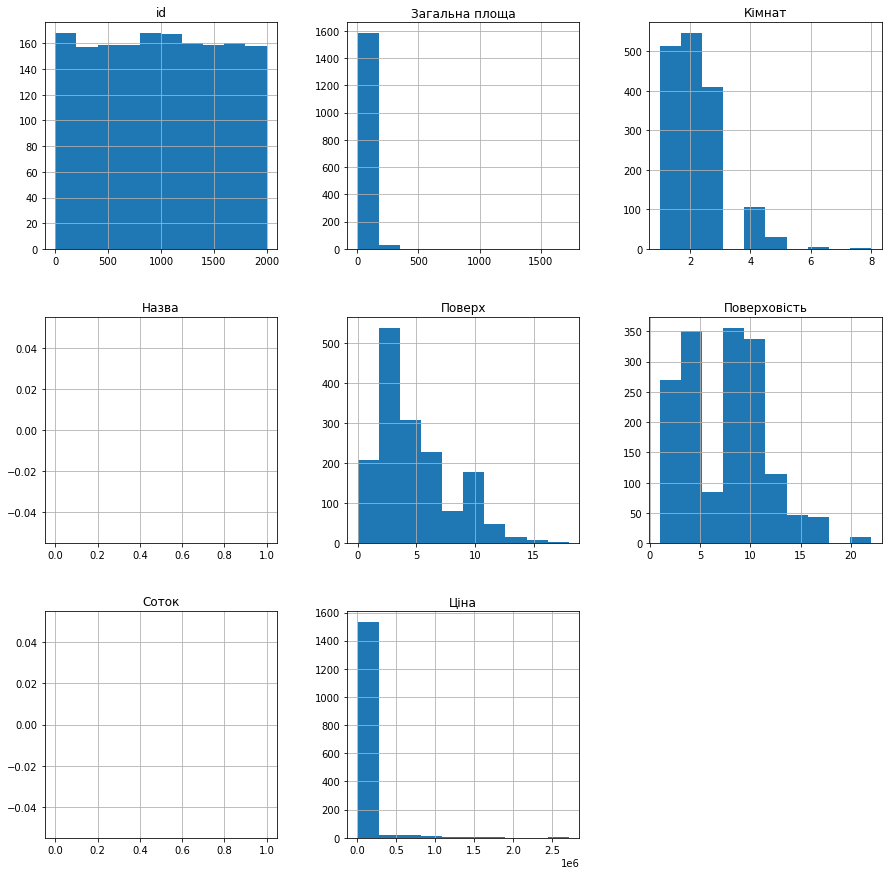

In [142]:
df.hist(figsize=(15, 15))
df.describe()

In [141]:
df.corr()

,id,Ціна,Кімнат,Поверх,Поверховість,Загальна площа,Назва,Соток
id,1.000000,-0.075042,0.064753,0.025983,-0.032142,0.058936,NaN,NaN
Ціна,-0.075042,1.000000,0.081033,0.095616,0.119385,0.154535,NaN,NaN
Кімнат,0.064753,0.081033,1.000000,-0.040867,-0.215078,0.505105,NaN,NaN
Поверх,0.025983,0.095616,-0.040867,1.000000,0.647118,-0.004337,NaN,NaN
Поверховість,-0.032142,0.119385,-0.215078,0.647118,1.000000,-0.102586,NaN,NaN
Загальна площа,0.058936,0.154535,0.505105,-0.004337,-0.102586,1.000000,NaN,NaN
Назва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Соток,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Investigate outliers, is it anomalies or just wrong values. 

#### Analyze correlations between features and target. 

#### Write your conclusions about data

##### Conclusion about data


## Data preprocessing

#### Convert non-numerical features to dummy variables. Think what to do if you have to many categories. 

#### Remove features if you wouldn`t use it.

#### Deal with missing values.

#### Scale features or target if necessary.

#### Split dataset into train, test and cross validation sets.

- ## Rename columns and set all prices in dolars (1UAH=28USD)
- ## Remove useless columns

In [ ]:
df = df.drop(columns = ["Місто", "Тип нерухомості", "Назва", "Агенція", "Телефон", "Опис", "Користувач", "Соток", "Область", "id", ])
df = df.rename(columns={"Вулиця": "street", "Район":"district", "Дата":"date" ,"Ціна" :"price", "Тип ціни": "price_type", "Кімнат": "rooms", "Поверх": "floor", "Поверховість" : "total_floors", "Загальна площа" : "total_area", "Житлова площа" :"living_area", "Кухня" : "kitchen_area", "Стіни":"walls"})
df.loc[df.price_type == "грн", 'price'] = df.price / 28
df = df.drop(columns=["price_type", "total_floors"])